### Lesson 12 Lab:  Linear Regression With the Bikeshare Dataset

Welcome!  This notebook is designed to provide additional practice for people looking to get more familiar with Linear Regression and SciKit Learn.  

The topic of the notebook is using Linear Regression to forecast demand for bikeshare stations.

The dataset has the following columns:  

  - **datetime:** a timestamp collected hourly.
  - **season:** a categorical column that lists the current season for that observation
  - **holiday:** a column (0 or 1), that detects whether or not it was a holiday
  - **workingday:** a column (0 or 1), that encodes whether or not it was a workday or not
  - **weather:** a categorical column that lists a light weather description for the observation
  - **temp:** the temperature outside
  - **atemp:** the temperature it feels like outside
  - **humidity:** the humidity outside
  - **windspeed:** the windspeed, in mph
  - **count:** the number of bikes checked out during that hour
  
Your job is to build a regression model that appropriately captures the information available to make the most accurate predictions.

### Step 1:  Load in the Dataset

 - It's called `bikeshare.csv`
 - Make sure to make `datetime` a time column
 - It's not a bad idea to use it as an index column, although this isn't necessary.

In [178]:
# your answer here
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/bikeshare.csv', index_col='datetime', parse_dates=True)

### Step 2: Transform Your Categorical Variables (If Necessary)

This dataset has two categorical columns -- `weather` and `season`.  Judging by their description, decide if they ought to be ordinal (contains a natural rank) or nominal (no natural rank).

Remember -- ordinal variables can be encoded using increasing integer values.  Ie, `SM --> 1`, `Med --> 2`, `Large --> 3`, etc.

Nominal variables should be one-hot encoded via `pd.get_dummies`.

In [179]:
# we'll take a look at categorical columns
df.select_dtypes(include=np.object)

,season,weather
datetime,,
2011-01-01 00:00:00,Spring,Clear Skies
2011-01-01 01:00:00,Spring,Clear Skies
2011-01-01 02:00:00,Spring,Clear Skies
2011-01-01 03:00:00,Spring,Clear Skies
2011-01-01 04:00:00,Spring,Clear Skies
2011-01-01 05:00:00,Spring,Partly Cloudy
2011-01-01 06:00:00,Spring,Clear Skies
2011-01-01 07:00:00,Spring,Clear Skies
2011-01-01 08:00:00,Spring,Clear Skies


In [180]:
# season looks like a nominal category
df.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [181]:
# weather, on the other hand, looks a bit more ordinal since
# we're dealing with outdoor activities
df.weather.unique()

array(['Clear Skies', 'Partly Cloudy', 'Light Storms/Rain',
       'Heavy Storms/Rain'], dtype=object)

In [182]:
# so we'll go ahead and make our appropriate changes
weather_vals = df.weather.unique().tolist()
df.weather.replace(['Clear Skies', 'Partly Cloudy', 'Light Storms/Rain', 'Heavy Storms/Rain'], [4, 3, 2, 1], inplace=True)

In [183]:
# and one hot encode the remaining dataset
df = pd.get_dummies(df)

### Step 3: Create a Training & Test Set

Given that there's a time based column, make the most recent values your test set.  Do a 20% split.  (You can use `train_test_split` for this, but it's not necessary.  You could also just sort by `datetime` and take the bottom 20% of rows for your test set).

**Note:** You can use the argument `shuffle=False` if you want to use `train_test_split` without shuffling the data.

In [184]:
# get the number of rows for the test set
test_length = int(len(df)*.2)
# and get where that index position should start
test_idx = len(df) - test_length
# sort the dataset by its index
df = df.sort_index()
# declare X and y
X = df.drop('count', axis=1)
y = df['count']
# and split into training and test set
X_train, X_test, y_train, y_test = X[:test_idx].copy(), X[test_idx:].copy(), y[:test_idx].copy(), y[test_idx:].copy() 

### Step 4: Create a Validation Set From Your Training Set

Remember....this is your test set within the training set.  Make it 20% of your training set.

In [185]:
# your code here
val_length = int(len(X_train)*.2)
# and where to start for the validation index
val_idx    = len(X_train) - val_length

In [186]:
# and create training and validation sets in the same way
X_train, X_val, y_train, y_val = X_train[:val_idx].copy(), X_train[val_idx:].copy(), y_train[:val_idx].copy(), y_train[val_idx:].copy()

### Step 5:  Do An Initial Fitting And Scoring of Your Model

 - Remember, fit on the training set, and score on the validation set.
 - Standardize your data before fitting
 - How much is your model overfitting (if at all)?
 - **Hint:** If you have a categorical value in your test set that's NOT in your training set, standardizing will give you some `NaN` values for columns.  Drop these columns from datasets before proceeding.  The `drop` method is the easiest way to do that.

In [187]:
# we'll standardize our data set using the values from the training set
train_means = train.mean()
train_stds  = train.std()

# and now we'll go ahead and standardize away
X_train -= train_means
X_train /= train_stds

X_val   -= train_means
X_val   /= train_stds

X_test  -= train_means
X_test  /= train_stds

In [188]:
# there are no values for Fall & Winter in the training set, so we'll drop
# these columns from ALL of the datasets
X_train.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_Fall,season_Spring,season_Summer,season_Winter
datetime,,,,,,,,,,,
2011-01-01 00:00:00,-0.150118,-1.464571,0.73743,-0.777813,-0.452098,0.961470,-1.633381,NaN,0.803247,-0.803247,NaN
2011-01-01 01:00:00,-0.150118,-1.464571,0.73743,-0.913255,-0.561231,0.915223,-1.633381,NaN,0.803247,-0.803247,NaN
2011-01-01 02:00:00,-0.150118,-1.464571,0.73743,-0.913255,-0.561231,0.915223,-1.633381,NaN,0.803247,-0.803247,NaN
2011-01-01 03:00:00,-0.150118,-1.464571,0.73743,-0.777813,-0.452098,0.683990,-1.633381,NaN,0.803247,-0.803247,NaN
2011-01-01 04:00:00,-0.150118,-1.464571,0.73743,-0.777813,-0.452098,0.683990,-1.633381,NaN,0.803247,-0.803247,NaN


In [189]:
# we drop the columns
X_train.drop(['season_Fall', 'season_Winter'], axis=1, inplace=True)
X_val.drop(['season_Fall', 'season_Winter'], axis=1, inplace=True)
X_test.drop(['season_Fall', 'season_Winter'], axis=1, inplace=True)

In [190]:
# and now fit
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X_train, y_train)
lreg.score(X_val, y_val)

0.10985493614840447

In [191]:
# for comparison sake, here's the score on our training set
lreg.score(X_train, y_train)

0.2474252143867561

### Step 7: Look At Your Coefficients

What seems to be having the most impact?

In [192]:
# your answer here -- 
coeffs = pd.DataFrame({
    'Columns': X_train.columns,
    'Weight' : lreg.coef_
}).sort_values(by='Weight', ascending=False)
# temperature & humidity dominate
coeffs

,Columns,Weight
4,atemp,72.323980
6,windspeed,5.937165
2,weather,0.578726
0,holiday,-1.355740
1,workingday,-2.281312
8,season_Summer,-2.961368
7,season_Spring,-3.672773
3,temp,-26.089014
5,humidity,-44.646391


### Step 8: Build New Features (ie, Add New Columns To Your Dataset)

This is your chance to think about ways to better capture the value and impact of time and other variables on the target variable (`count`).

What you should do here is add a new feature to your training and validation set, re-run your model on the  training set, and score it on the validation set to see if it made an improvement.  

A good place to start with this is extracting out different date parts to see if they improve your validation score.

You can find information about the different dateparts in pandas here:  https://pandas.pydata.org/pandas-docs/version/0.24/reference/series.html#time-series-related

Or if you're using the `datetime` column as an index:  https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

Keep features if they improve your validation score, discard them if they don't.

A few other ideas:  

 - you can create a column called `Daytime` that tests whether or not it's light outside.  (Ie, between 7PM - 7AM is `False`, `True` otherwise).  You could also get fancier and adjust the daylight hours depending on season.  

 - you can also create a variable that tracks the passage of time.  This can be done by finding the earliest date in the dataset, subtracting each observed date from that and extracting the datepart in days.  This way, if you have an upward or downward trend throughout the dataset, you'd be able to capture it.

You could also try multiplying different columns together.  Maybe it being `Daytime`, `Sunny` and low humidity has a multiplicative effect that isn't totally captured by any of the variables by themselves.

**Note:** Dateparts, despite being numbers, are probably best encoded as **nominal** variables.....think about it -- the 11 AM hour is something distinct from the 11 PM hour.....they are best interpreted as being separate categories than one continuous column.  You should onehot encode them.

In [193]:
# this function will help us out a little bit to quickly
# get validation scores
def get_val_scores(X_train=X_train, X_val=X_val):
    new_val_score = lreg.fit(X_train, y_train).score(X_val, y_val)
    return new_val_score

Now, we'll take a look at a few different things

In [194]:
# creating a column that tracks the passage of time in days
# find the earliest value in the dataset
earliest_date   = X_train.index.min()
# capture the passage of time in days for both training and val
X_train['time'] = (X_train.index - earliest_date).days
X_val['time']   = (X_val.index - earliest_date).days
# and get the new validation scores
get_val_scores()
# and this helped.....

0.18569799119747787

In [195]:
# and now we'll do a few more, just to kick the tires a little bit
# get the hour part from the timestamp
X_train['hours'] = X_train.index.hour
X_val['hours']   = X_val.index.hour
# and get the new validation scores -- notice we're one hot encoding the hours column
get_val_scores(X_train=pd.get_dummies(X_train, columns=['hours']), X_val=pd.get_dummies(X_val, columns=['hours']))
# and this also helped -- quite a bit

0.6042963256369845

In [196]:
# so we'll go ahead and make the changes permanent to our dataset
X_train = pd.get_dummies(X_train, columns=['hours'])
X_val   = pd.get_dummies(X_val, columns=['hours'])

In [199]:
# and we'll also go ahead and create a column for daytime / nighttime
X_train['daylight'] = (X_train.index.hour >= 8) & (X_train.index.hour <= 19)
X_val['daylight']   = (X_val.index.hour >= 8) & (X_val.index.hour <= 19)
# and check the validation scores
get_val_scores(X_train=pd.get_dummies(X_train, columns=['daylight']), X_val=pd.get_dummies(X_val, columns=['daylight']))
# this didn't really move the needle at all, so we'll exclude it

0.6042962172730286

In [200]:
X_train.drop('daylight', axis=1, inplace=True)
X_val.drop('daylight', axis=1, inplace=True)

### Step 9: Fit Your Model On ALL of your training data

An important step here -- now that you've figured out what columns to include, and what ones to exclude, concatenate your training and validation sets, and fit your model on ALL of your training data.

The idea now is that you've found the features that help, you should give your model more samples to infer from.

You would use the `pd.concat()` method here.

Also -- for good measure, standardize all of your training data before fitting it.

In [211]:
# concatenate
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])
# and fit the model on all of your training data
X -= X.mean()
X /= X.std()
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 10: Score Your Model on the Test Set

Once you've found the best version of your model on your validation set, transform your test set so that it is setup the same way.

Ie, if you added a column that improved your validation score, add that same column to your test set.  

Remember to standardize your test set using the values from your training set.

How close were your validation scores to your test set scores?

In [208]:
# we'll add the two columns we used for validation
X_test['time']  = (X_test.index - earliest_date).days
X_test['hours'] = X_test.index.hour
X_test          = pd.get_dummies(X_test, columns=['hours'])

In [209]:
# and we will standardize our data before fitting
X_test -= X.mean()
X_test /= X.std()

In [212]:
lreg.score(X_test, y_test)

0.6267223576507205

Overall......not too bad.  We were able to significantly improve our score based on the addition of various time based variables, and our test scores mapped pretty closely to our validation scores, meaning we weren't foolishly going down wrong paths.

### Diagnostics

Now we'll look at a few different areas of your model to see if there's anything causing our results to be skewed.

### Step 11:  Look at the values of the `count` column in your training set.  Are any of them unusually large?

A histogram is a good way to visualize this.

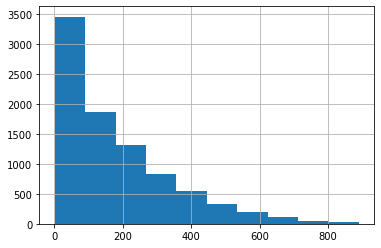

In [228]:
# there is a right tail for very large values, but maybe not disproportionately so
y.hist();

### Step 11:  Make a prediction on your test set, and calculate the error

The error in this case is just the difference between the value for `count` and the value of your prediction.

In [221]:
# your answer here
X_test['prediction'] = lreg.predict(X_test)
X_test['error']      = X_test['prediction'] - y_test

### Step 12:  Look at correlations between your error rates and the different columns in X.

Is there anything that's systematically associated with your model making bad predictions?

In [231]:
# your answer here -- we'll remove the error and prediction columns
np.abs(X_test.corr()['error']).sort_values(ascending=False)[2:]

humidity         2.827194e-01
hours_17         2.007127e-01
temp             1.608546e-01
hours_18         1.561571e-01
hours_8          1.363286e-01
windspeed        1.342350e-01
atemp            1.298737e-01
hours_4          1.270231e-01
hours_2          1.231382e-01
hours_3          1.199816e-01
hours_5          1.163684e-01
hours_16         1.146672e-01
hours_1          1.110987e-01
hours_0          9.452705e-02
hours_6          7.870973e-02
hours_23         7.698381e-02
time             7.541618e-02
hours_19         7.201751e-02
workingday       6.926366e-02
hours_22         6.679521e-02
weather          6.130952e-02
hours_15         6.125358e-02
hours_12         6.065356e-02
hours_13         5.354990e-02
hours_14         4.016055e-02
hours_21         3.820816e-02
hours_7          2.857389e-02
hours_11         1.952264e-02
holiday          1.202920e-02
hours_9          1.148476e-02
hours_10         1.145983e-02
hours_20         4.926912e-03
season_Summer    2.798884e-16
season_Spr

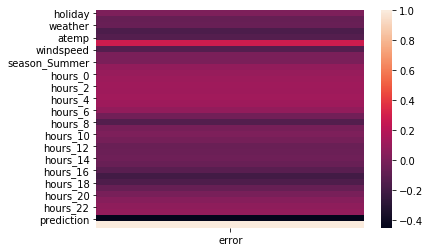

In [233]:
# or if you want to visualize it
import seaborn as sns
sns.heatmap(X_test.corr()[['error']]);